<a href="https://colab.research.google.com/github/Aman151295/Clustering_Using_KMeans-/blob/main/Crime%20Data%20analysis%20using%20KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **KMeans clustering for Crime Dataset**

In [55]:
import pandas as pd
import numpy as np
import scipy 
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [56]:
#Importing the dataset

US_Crime_Data =  pd.read_csv('/content/crime_data.csv')
print(US_Crime_Data)

        Unnamed: 0  Murder  Assault  UrbanPop  Rape
0          Alabama    13.2      236        58  21.2
1           Alaska    10.0      263        48  44.5
2          Arizona     8.1      294        80  31.0
3         Arkansas     8.8      190        50  19.5
4       California     9.0      276        91  40.6
5         Colorado     7.9      204        78  38.7
6      Connecticut     3.3      110        77  11.1
7         Delaware     5.9      238        72  15.8
8          Florida    15.4      335        80  31.9
9          Georgia    17.4      211        60  25.8
10          Hawaii     5.3       46        83  20.2
11           Idaho     2.6      120        54  14.2
12        Illinois    10.4      249        83  24.0
13         Indiana     7.2      113        65  21.0
14            Iowa     2.2       56        57  11.3
15          Kansas     6.0      115        66  18.0
16        Kentucky     9.7      109        52  16.3
17       Louisiana    15.4      249        66  22.2
18          

In [57]:
US_Crime_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [58]:
# Normalising the data

Scaler = StandardScaler()


Crime_Scaled_Data = Scaler.fit_transform(US_Crime_Data.iloc[:,1:])

print(Crime_Scaled_Data)


[[ 1.25517927  0.79078716 -0.52619514 -0.00345116]
 [ 0.51301858  1.11805959 -1.22406668  2.50942392]
 [ 0.07236067  1.49381682  1.00912225  1.05346626]
 [ 0.23470832  0.23321191 -1.08449238 -0.18679398]
 [ 0.28109336  1.2756352   1.77678094  2.08881393]
 [ 0.02597562  0.40290872  0.86954794  1.88390137]
 [-1.04088037 -0.73648418  0.79976079 -1.09272319]
 [-0.43787481  0.81502956  0.45082502 -0.58583422]
 [ 1.76541475  1.99078607  1.00912225  1.1505301 ]
 [ 2.22926518  0.48775713 -0.38662083  0.49265293]
 [-0.57702994 -1.51224105  1.21848371 -0.11129987]
 [-1.20322802 -0.61527217 -0.80534376 -0.75839217]
 [ 0.60578867  0.94836277  1.21848371  0.29852525]
 [-0.13637203 -0.70012057 -0.03768506 -0.0250209 ]
 [-1.29599811 -1.39102904 -0.5959823  -1.07115345]
 [-0.41468229 -0.67587817  0.03210209 -0.34856705]
 [ 0.44344101 -0.74860538 -0.94491807 -0.53190987]
 [ 1.76541475  0.94836277  0.03210209  0.10439756]
 [-1.31919063 -1.06375661 -1.01470522 -1.44862395]
 [ 0.81452136  1.56654403  0.10

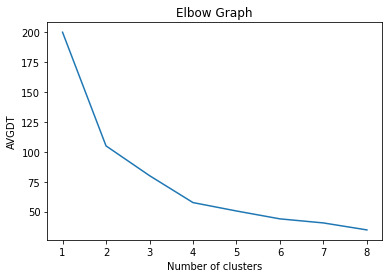

In [59]:
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 


AVGDT = []

for i in range (1,9):
  kmeans = KMeans(n_clusters = i, random_state = 0)
  kmeans.fit(Crime_Scaled_Data)
  AVGDT.append(kmeans.inertia_)


plt.plot(range(1,9), AVGDT)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('AVGDT')
plt.show()

In [60]:
# Build Cluster algorithm using K=4

Cluster_4 = KMeans(4, random_state = 0)
Cluster_4.fit(Crime_Scaled_Data)

KMeans(n_clusters=4, random_state=0)

In [61]:
#Lables for Cluster
Cluster_4.labels_


# Adding a cluster column in Original DataFrame

US_Crime_Data['Cluster no'] = Cluster_4.labels_


# Check the no of records associated to each cluster based on Similarity

US_Crime_Data['Cluster no'].value_counts()

0    16
1    13
2    13
3     8
Name: Cluster no, dtype: int64

In [62]:
# Group data by Clusters (K=5)

US_Crime_Data.groupby('Cluster no').agg(['mean']).reset_index()

,Cluster no,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250
1,1,10.815385,257.384615,76.000000,33.192308
2,2,3.600000,78.538462,52.076923,12.176923
3,3,13.937500,243.625000,53.750000,21.412500


In [63]:
US_Crime_Data = US_Crime_Data.rename(columns = {'Unnamed: 0' : 'USplaces'})


In [64]:
US_Crime_Data.loc[(US_Crime_Data['Cluster no'] == 1)]

,USplaces,Murder,Assault,UrbanPop,Rape,Cluster no
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
24,Missouri,9.0,178,70,28.2,1
27,Nevada,12.2,252,81,46.0,1


In [74]:
US_Crime_Data['USplaces'] [US_Crime_Data['Cluster no'] == 0 ]




6       Connecticut
7          Delaware
10           Hawaii
13          Indiana
15           Kansas
20    Massachusetts
29       New Jersey
34             Ohio
35         Oklahoma
36           Oregon
37     Pennsylvania
38     Rhode Island
43             Utah
45         Virginia
46       Washington
49          Wyoming
Name: USplaces, dtype: object

In [75]:
US_Crime_Data['USplaces'] [US_Crime_Data['Cluster no'] == 1 ]

1         Alaska
2        Arizona
4     California
5       Colorado
8        Florida
12      Illinois
19      Maryland
21      Michigan
24      Missouri
27        Nevada
30    New Mexico
31      New York
42         Texas
Name: USplaces, dtype: object

In [76]:
US_Crime_Data['USplaces'] [US_Crime_Data['Cluster no'] == 2 ]

11            Idaho
14             Iowa
16         Kentucky
18            Maine
22        Minnesota
25          Montana
26         Nebraska
28    New Hampshire
33     North Dakota
40     South Dakota
44          Vermont
47    West Virginia
48        Wisconsin
Name: USplaces, dtype: object

In [77]:
US_Crime_Data['USplaces'] [US_Crime_Data['Cluster no'] == 3]

0            Alabama
3           Arkansas
9            Georgia
17         Louisiana
23       Mississippi
32    North Carolina
39    South Carolina
41         Tennessee
Name: USplaces, dtype: object